In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('/content/sample_data/Mobile-Company-Telco-Customer-Churn.csv', delimiter = ',')
pd.pandas.set_option('display.max_columns', None)

In [ ]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df = df.drop(['customerID'], axis=1)

In [ ]:
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder 
lbe = LabelEncoder()

cat_cols = [col for col in df.columns if df[col].dtype=="O"]
print(cat_cols)
for col in cat_cols:
  if len(df[col].unique()) < 10:
    df[col]= lbe.fit_transform(df[col])
  else:
    df = df.drop(col, axis = 1)

df

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,1


In [ ]:
df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
Churn                 int64
dtype: object

In [ ]:
X = df.drop('Churn', axis = 1)
y = df['Churn']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm_arr = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(tn)
print(fp)
print(fn)
print(tp)

1178
149
207
227


<Axes: >

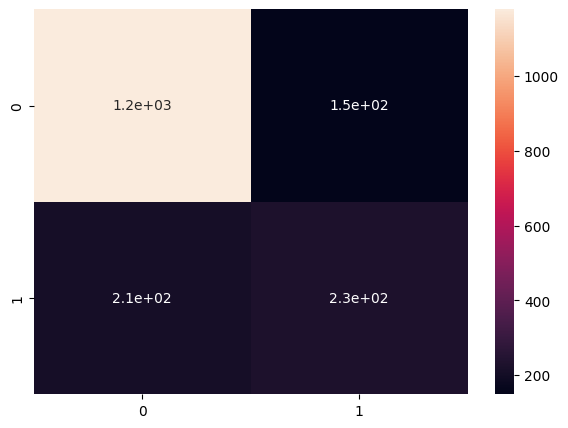

In [ ]:
df_cm = pd.DataFrame(cm_arr, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

## Accuracy

In [ ]:
accuracy = (tp + tn) / (tp + tn + fp + fn)
accuracy

0.8018171493469619

## Error Rate

In [ ]:
error_rate = (fp + fn) / (tp + tn + fp + fn)
error_rate

0.19818285065303803

## Precision

In [ ]:
precision = (tp) / (tp + fp)
precision

0.6145552560646901

## Sensitivity

In [ ]:
sensitivity = (tp) / (tp + fn)
sensitivity

0.5253456221198156

## Specificity

In [ ]:
specificity = (tn) / (tp + fp)
specificity

3.1913746630727764

## ROC

In [ ]:
import math
ROC = math.sqrt(sensitivity ** 2 + specificity ** 2) / math.sqrt(2)
ROC

2.2870133649350777

## F1 Score

In [ ]:
f1_score = (2 * precision * sensitivity) / (precision + sensitivity)
f1_score

0.5664596273291925

## Geometric Mean

In [ ]:
geometric_mean = math.sqrt(sensitivity * specificity)
geometric_mean

1.2948261303315534

## False Positive Rate

In [ ]:
fpr = 1 - specificity
fpr

-2.1913746630727764

## False Negative Rate

In [ ]:
fnr = 1 - sensitivity
fnr

0.4746543778801844

## ROC Curve

[0.         0.52534562 1.        ]


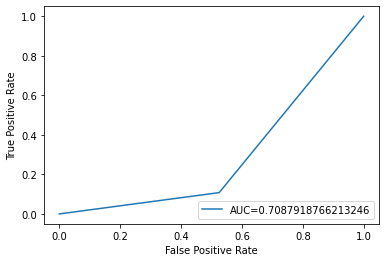

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=0)
print(fpr)
auc = metrics.roc_auc_score(y_test, y_pred)

plt.plot(fpr,tpr, label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show() 

# Logistic Regression

In [ ]:
df = pd.read_csv('/content/sample_data/Salary_Data.csv')

In [ ]:
# df.head(5)
print(df.shape)
X = df['YearsExperience']
y = df['Salary']

(30, 2)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train= X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred

array([ 74978.61852009,  91649.44173553,  62012.42268586,  81461.7164372 ,
        67569.36375767,  88870.97119962, 113877.20602278,  44415.44262512])

In [ ]:
y_mean = sum(y) / len(y)
x_mean = sum(X) / len(X)

## Karl Pearson's Coefficient

In [ ]:
x2 = 0
for val in X:
  x2 += (val - x_mean) * (val - x_mean)

y2 = 0
for val in y:
  y2 += (val - y_mean) * (val - y_mean)

num = 0
for i, j in zip(X, y):
  num += (i - x_mean) * (j - y_mean)

r = num / (math.sqrt(x2 * y2))
print(r)

0.9782416184887598


## Coefficient of Determination

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
R_sq = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(mse)

40884620.50478402


##Mean Squared Error

In [ ]:
mse = 0

for i , j in zip(y_test, y_pred):
  mse += (i - j) * (i - j)

print(mse / len(y_test))

40884620.50478402


## Root mean squared error

In [ ]:
root_mean_sq_error = math.sqrt(mse)
print(root_mean_sq_error)

18085.269255343483


## Root mean squared relative error


In [ ]:
rmser = 0

for i,j in zip(y_test, y_pred):
  rmser += ((i - j) / i) ** 2

rmser = math.sqrt(rmser / len(y_test))
print(rmser)

0.07528222476626306


## Mean Absolute error

In [ ]:
mae = 0
for i,j in zip(y_test, y_pred):
  mae += abs(i - j)

mae = mae / len(y_test)
print(mae)

5215.553722712969


## Mean Absolute Percentage Error

In [ ]:
mape = 0
for i,j in zip(y_test, y_pred):
  mape = abs((i - j) / i)

mape = (mape / len(y_test)) * 100
print(mape)

0.25572734782181294
